<a href="https://colab.research.google.com/github/s0m11nn/mygit/blob/main/1%EC%A3%BC%EC%B0%A8_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#드라이브 내에 있는 csv파일 가져오기 위한 권한 받기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#드라이브 내에 있는 csv 파일 가져오기
import pandas as pd

file = '/content/drive/MyDrive/Colab Notebooks/2025-01/캡스톤/서울일자리포털_인재정보_직종별,지역별_목록_20250325.csv'

df = pd.read_csv(file, encoding='euc-kr')     #utf-8이 자꾸 오류가 떠서 한글 인코딩 가능한 다른 euc-kr로 진행

In [ ]:
#matplotlib이 한글지원 안해서 한글 보이게 하는 전처리

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

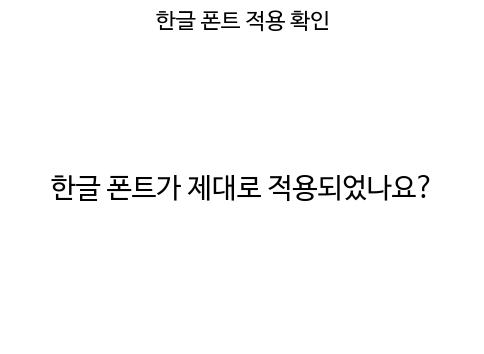

In [ ]:
#오류 뜰 때가 많아서 한글 잘 보이는지 테스트해봄

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.text(0.5, 0.5, '한글 폰트가 제대로 적용되었나요?', ha='center', va='center', fontsize=20)

plt.title('한글 폰트 적용 확인', fontsize=16)
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

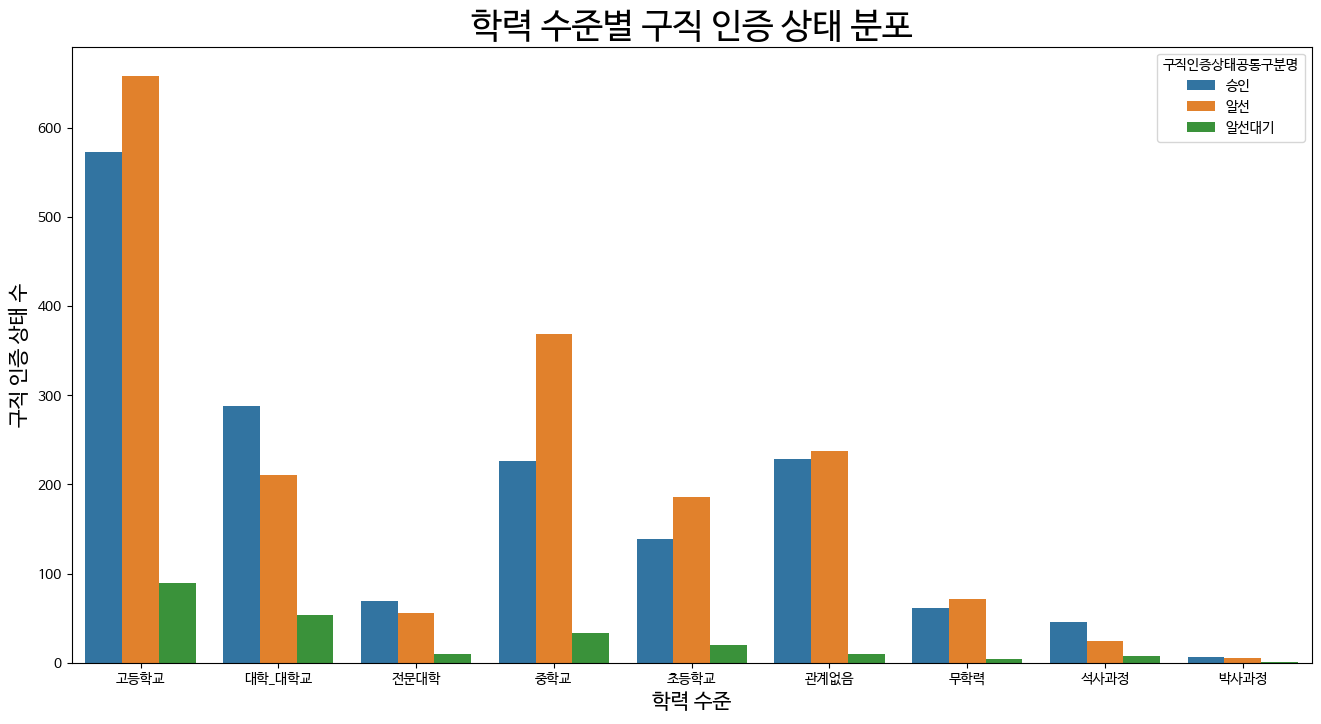

In [ ]:
#학력 수준별 구직 인증 상태 분포
df_acdm_job = df.dropna(subset=['학력공통코드명', '구직인증상태공통구분명'])

plt.figure(figsize=(16,8))
sns.countplot(x='학력공통코드명', hue='구직인증상태공통구분명', data=df_acdm_job)

plt.title('학력 수준별 구직 인증 상태 분포', fontsize=25)
plt.xlabel('학력 수준', fontsize=15)
plt.ylabel('구직 인증 상태 수', fontsize=15)

plt.show()

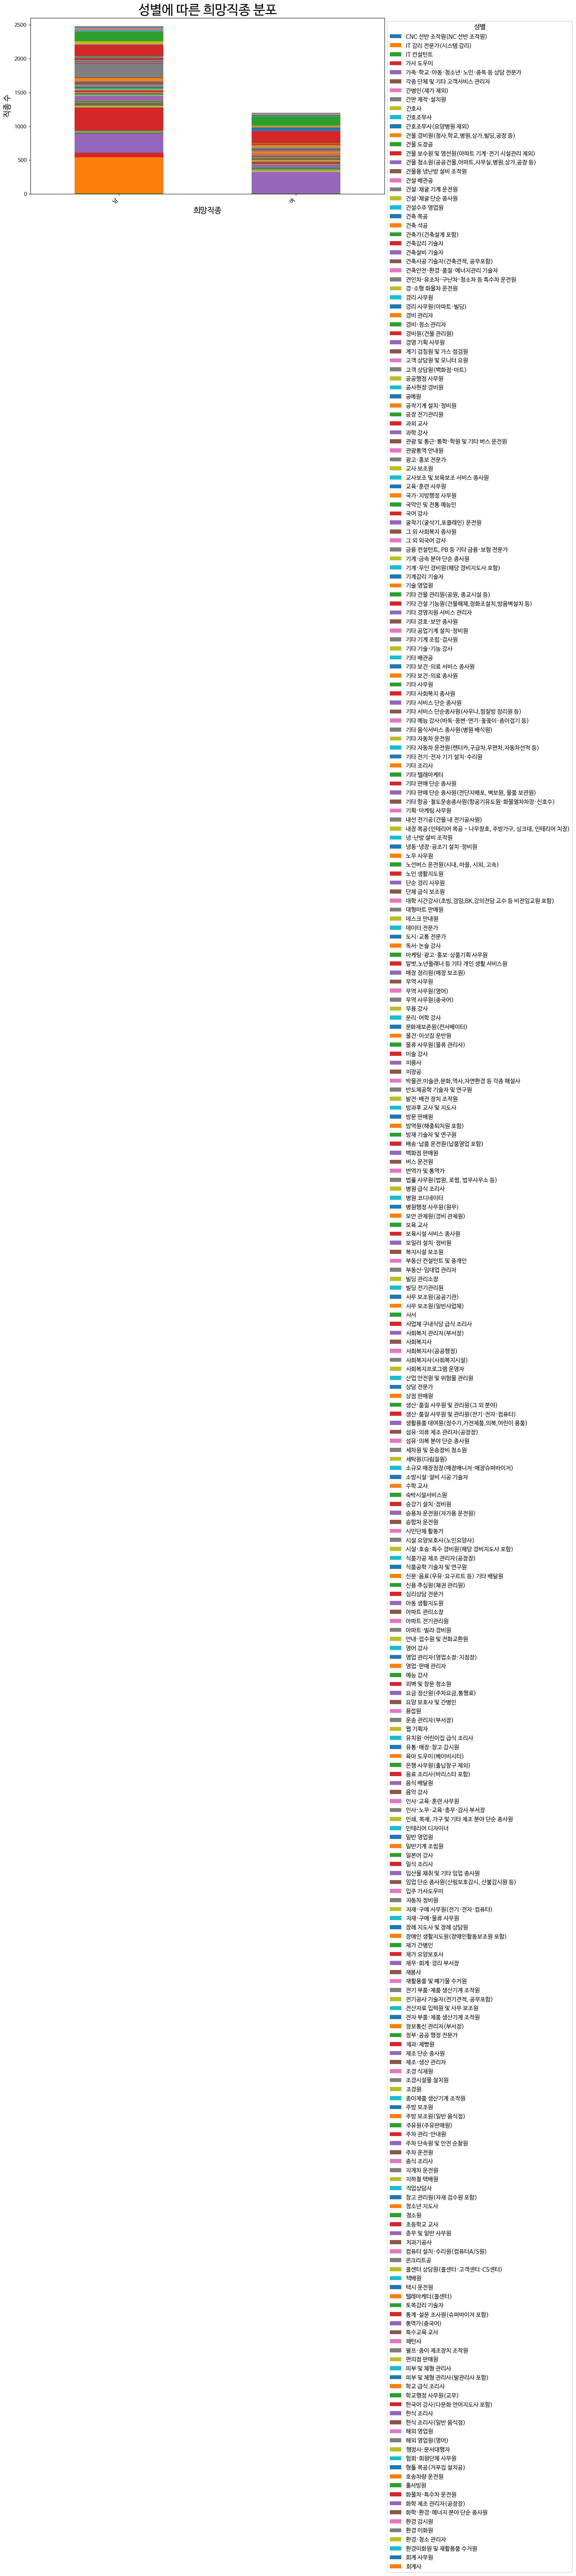

In [ ]:
#성별에 따른 희망직종 분포
gender_hopejob = df.groupby(['성별','희망직종공통코드명']).size().unstack(fill_value=0)   #NaN 값에 0을 채우기 위해
gender_hopejob.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('성별에 따른 희망직종 분포', fontsize=25)
plt.xlabel('희망직종', fontsize=15)
plt.ylabel('직종 수', fontsize=15)
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.legend(title='성별', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))   #범례 추가

plt.show()

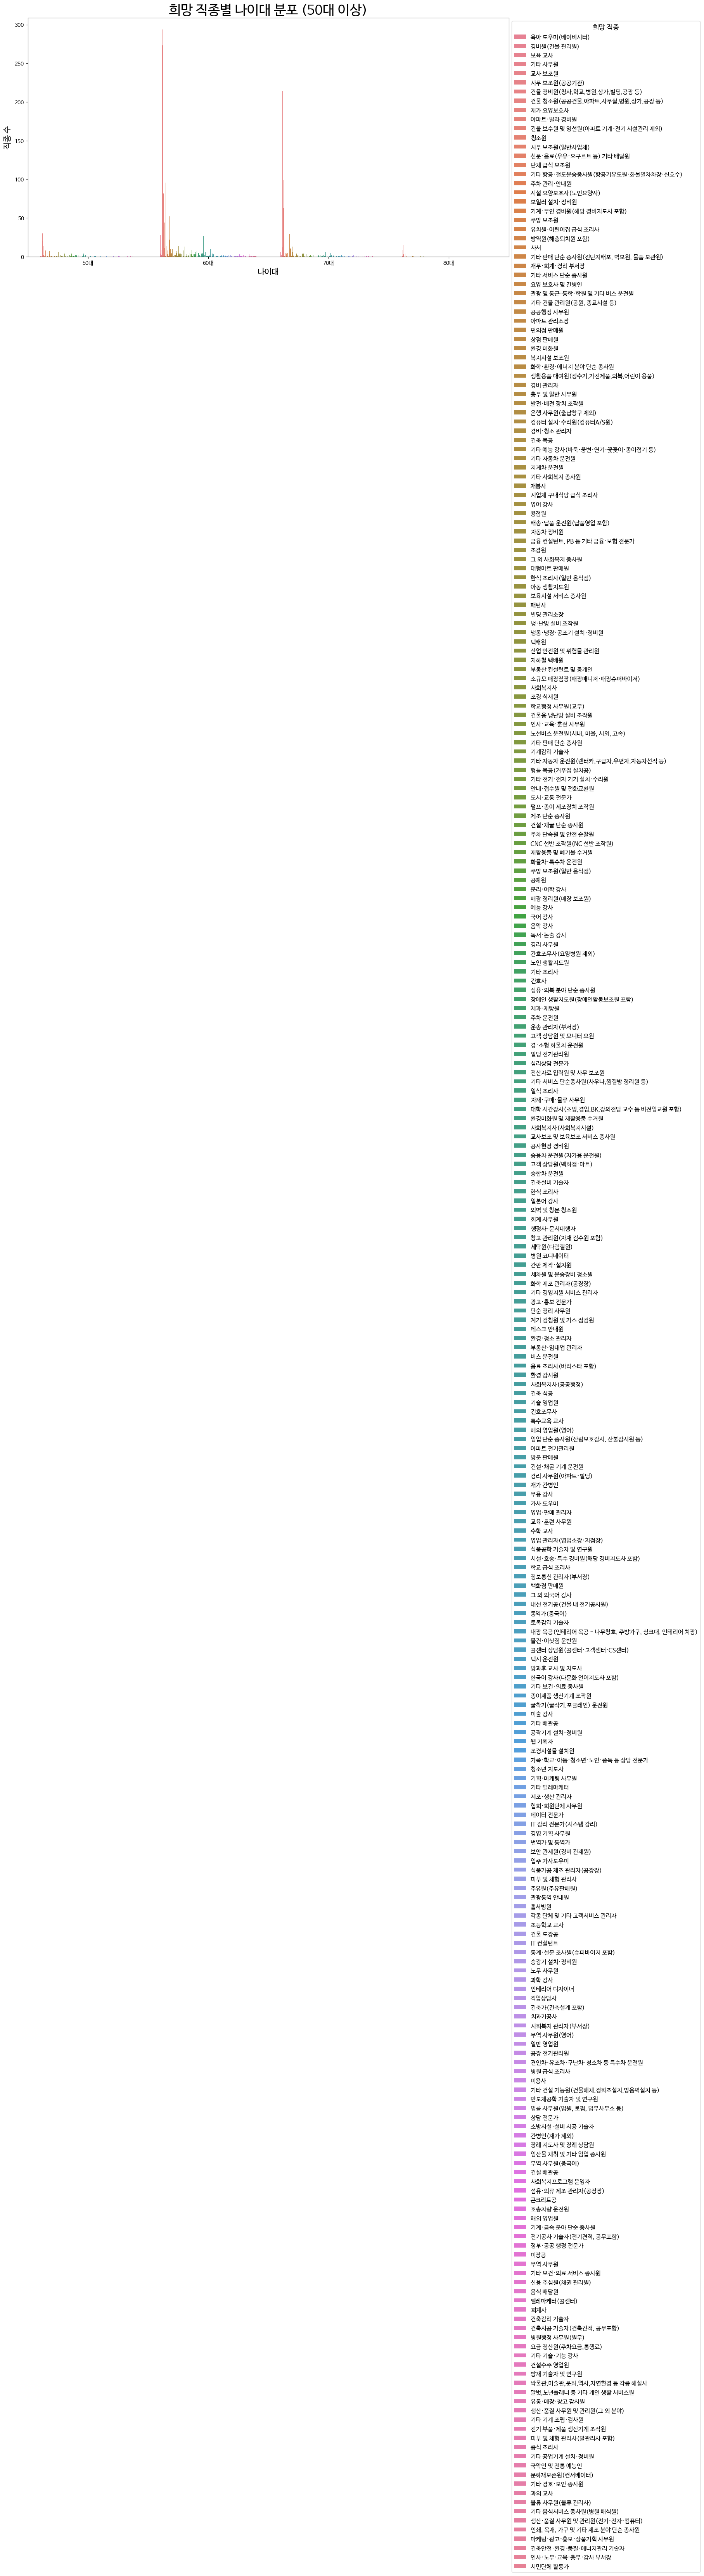

In [ ]:
#희망 직종별 나이대 분포
#데이터에서 주어진 나이대가 40대 이하, 90대 이상는 거의 없고, 5~60대에 몰려있어 그 이전 데이터는 취급하지 않음

df = df.dropna(subset=['나이'])

age_bins = [50, 60, 70, 80, 90]
age_labels = ["50대", "60대", "70대", "80대"]

df['나이대'] = pd.cut(df['나이'], bins=age_bins, labels=age_labels, right=False)

df_age = df[df['나이대'].notnull()]

plt.figure(figsize=(16, 8))
sns.countplot(x='나이대', hue='희망직종공통코드명', data=df_age)

plt.title('희망 직종별 나이대 분포 (50대 이상)', fontsize=25)
plt.xlabel('나이대', fontsize=15)
plt.ylabel('직종 수', fontsize=15)

plt.legend(title='희망 직종', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

경력에 따른 희망 직종 분포를 그릴 생각

경력이 어떻게 분포되어있는지 확인하고 싶어서 df[희망직종경력년수]를 그래프로 확인

df_d = df.dropna(subset=['희망직종경력년수'])

plt.figure(figsize=(10, 6))

sns.histplot(df_d['희망직종경력년수'], kde=True, bins=10)

plt.title('희망직종경력년수 분포', fontsize=16)
plt.xlabel('희망직종경력년수', fontsize=12)
plt.ylabel('빈도', fontsize=12)

plt.show()
로 확인한 그래프 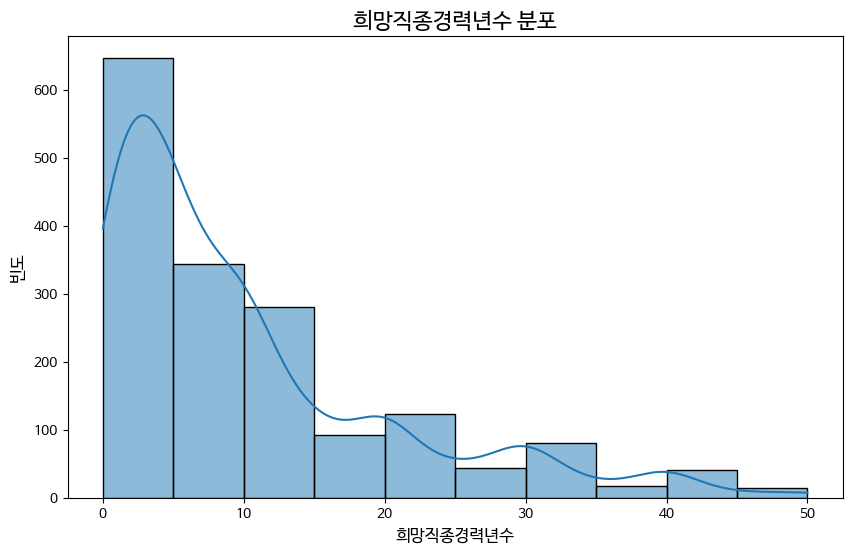

<ipython-input-44-7040078c4f4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hopejob_year['경력범위'] = pd.cut(df_hopejob_year['희망직종경력년수'], bins=bins, labels=labels, right=False)
<ipython-input-44-7040078c4f4a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  career_hopejob = df_hopejob_year.groupby(['경력범위', '희망직종공통코드명']).size().unstack()


<Figure size 1500x1000 with 0 Axes>

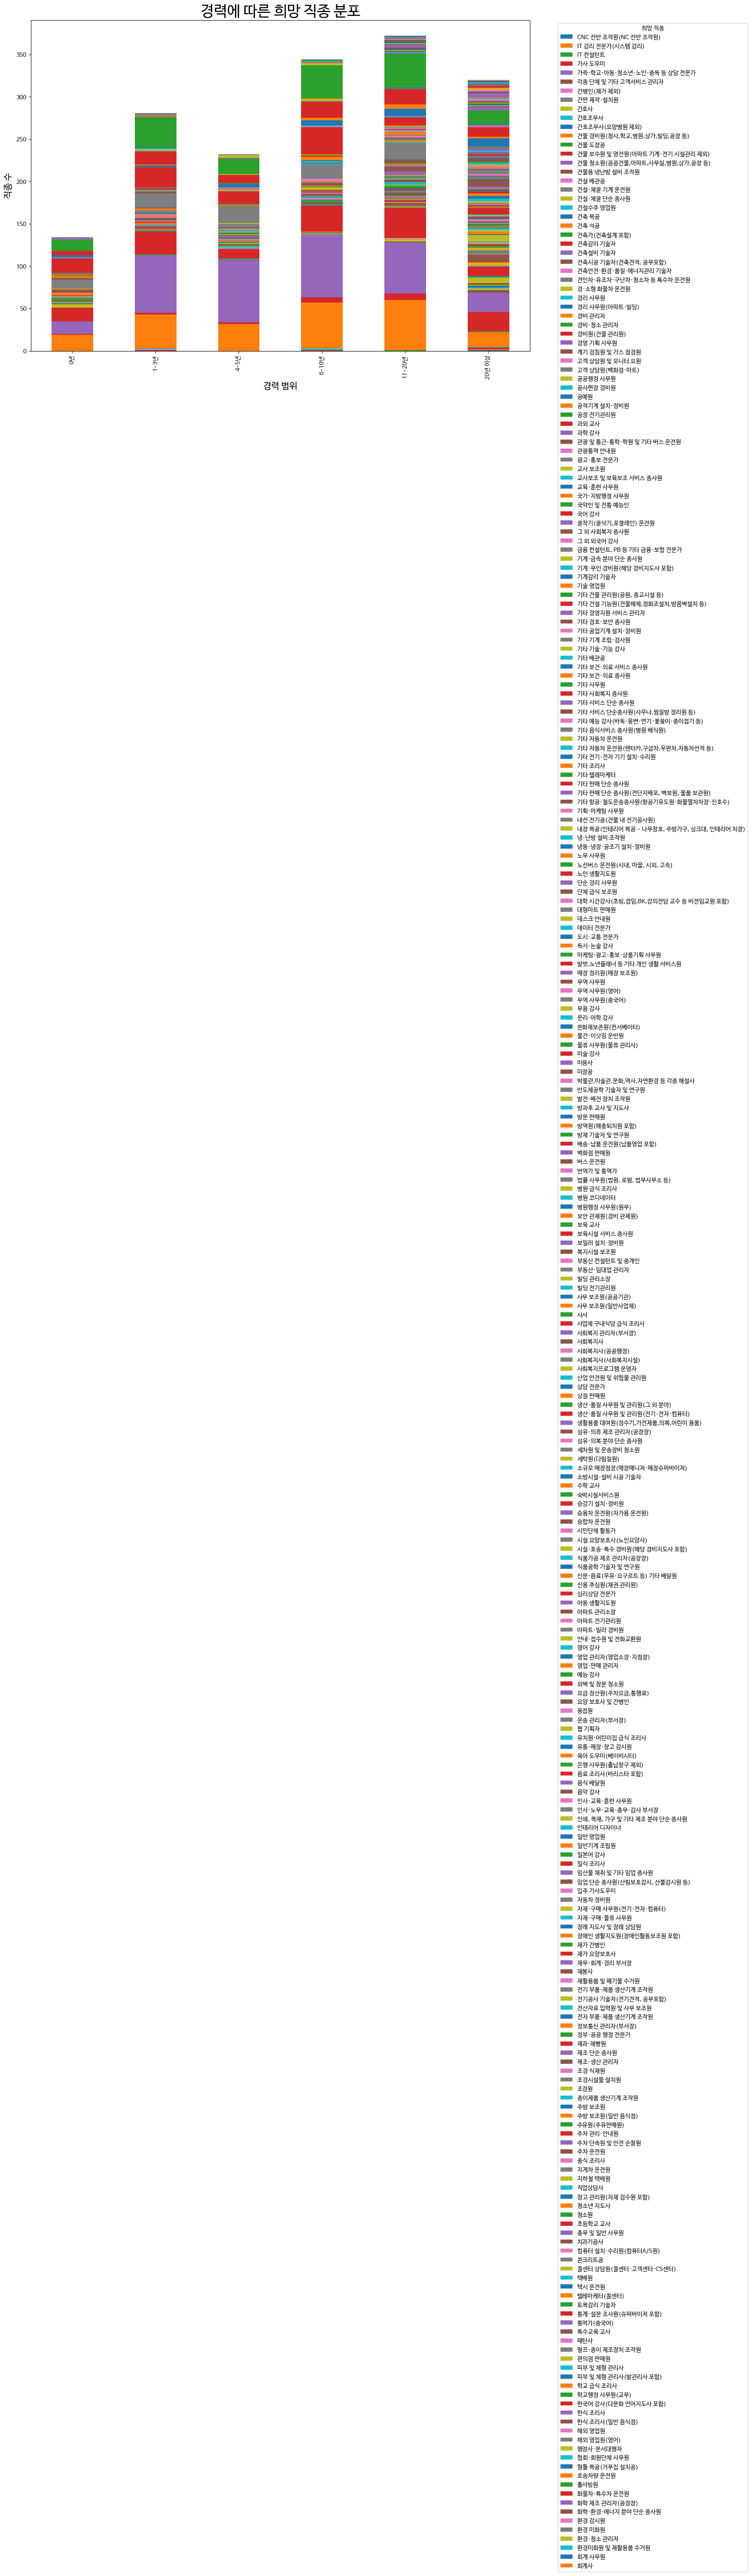

In [ ]:
#경력에 따른 희망 직종 분포
df_hopejob_year = df[['희망직종공통코드명', '희망직종경력년수']]

bins = [0, 1, 3, 5, 10, 20, 100]
labels = ['0년', '1-3년', '4-5년', '6-10년', '11-20년', '20년 이상']
df_hopejob_year['경력범위'] = pd.cut(df_hopejob_year['희망직종경력년수'], bins=bins, labels=labels, right=False)

career_hopejob = df_hopejob_year.groupby(['경력범위', '희망직종공통코드명']).size().unstack()

plt.figure(figsize=(15, 10))
career_hopejob.plot(kind='bar', stacked=True, figsize=(15,10))

plt.title('경력에 따른 희망 직종 분포', fontsize=25)
plt.xlabel('경력 범위', fontsize=15)
plt.ylabel('직종 수', fontsize=15)

plt.legend(title='희망 직종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()